#**Import Data**

##**Install latest version of seaborn**

##**Install dependencies**

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1LGzFPZ5AEVFRWjr2OKiZLNDzf4zwX5GV'

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('HR.xlsx') 

In [0]:
!pip3 install seaborn==0.9.0

#**Import Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 99
from scipy.stats import chi2_contingency as chi
from scipy import stats
from itertools import combinations
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#** Load Data**

In [0]:
df = pd.read_excel('HR.xlsx',sheet_name = 'WA_Fn-UseC_-HR-Employee-Attriti')

In [0]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [0]:
df.shape

(1470, 35)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [0]:
education = {1:'Below_College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
environmentsatisfaction = {1:'Low',2:'Medium',3:'High',4:'Very_High'}
jobinvolvement = {1:'Low',2:'Medium',3:'High',4:'Very_High'}
jobsatisfaction = {1:'Low',2:'Medium',3:'High',4:'Very_High'}
relationshipsatisfaction = {1:'Low',2:'Medium',3:'High',4:'Very_High'}
performancerating = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}
worklifealance = {1:'Bad',2:'Good',3:'Better',4:'Best'}

In [0]:
df.Education = df.Education.map(education)
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.map(environmentsatisfaction)
df.JobInvolvement = df.JobInvolvement.map(jobinvolvement)
df.JobSatisfaction = df.JobSatisfaction.map(jobsatisfaction)
df.RelationshipSatisfaction = df.RelationshipSatisfaction.map(relationshipsatisfaction)
df.PerformanceRating = df.PerformanceRating.map(performancerating)
df.WorkLifeBalance = df.WorkLifeBalance.map(worklifealance)

In [0]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very_High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below_College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very_High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very_High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0


In [0]:
 df.EmployeeNumber.value_counts()

2046    1
641     1
644     1
645     1
647     1
648     1
649     1
650     1
652     1
653     1
655     1
656     1
657     1
659     1
661     1
662     1
663     1
664     1
665     1
666     1
667     1
643     1
639     1
671     1
638     1
611     1
612     1
613     1
614     1
615     1
       ..
1395    1
1396    1
1397    1
1399    1
1401    1
1402    1
1403    1
1374    1
1373    1
1372    1
1356    1
1338    1
1340    1
1344    1
1346    1
1349    1
1350    1
1352    1
1355    1
1358    1
1371    1
1360    1
1361    1
1362    1
1363    1
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null object
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null object
MaritalStatus               1470 non-null object
MonthlyIncome     

#**EDA**

In [0]:
def split_nu_cat(data):
    numerical_fea = []
    categorical_fea = []
    for i in data.columns:
        if df[i].dtype == np.int64:
            numerical_fea.append(i)
        else:
            categorical_fea.append(i)
    return numerical_fea, categorical_fea
numerical_features, categorical_features = split_nu_cat(df)
categorical_features.remove('Attrition')

In [0]:
for i in categorical_features:
    print(i)

BusinessTravel
Department
Education
EducationField
EnvironmentSatisfaction
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
WorkLifeBalance


##**EDA of Numerical Features**

In [0]:
plt.figure(figsize=(20,25))
j = 1
k = 0
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
for i in numerical_features:
    plt.subplot(7,4,j)
    sns.distplot(df[i])
    plt.ylabel(numerical_features[k])
    plt.text(left,top,i)
    j = j+1
    k = k+1
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ValueError: ignored

<Figure size 1440x1800 with 19 Axes>

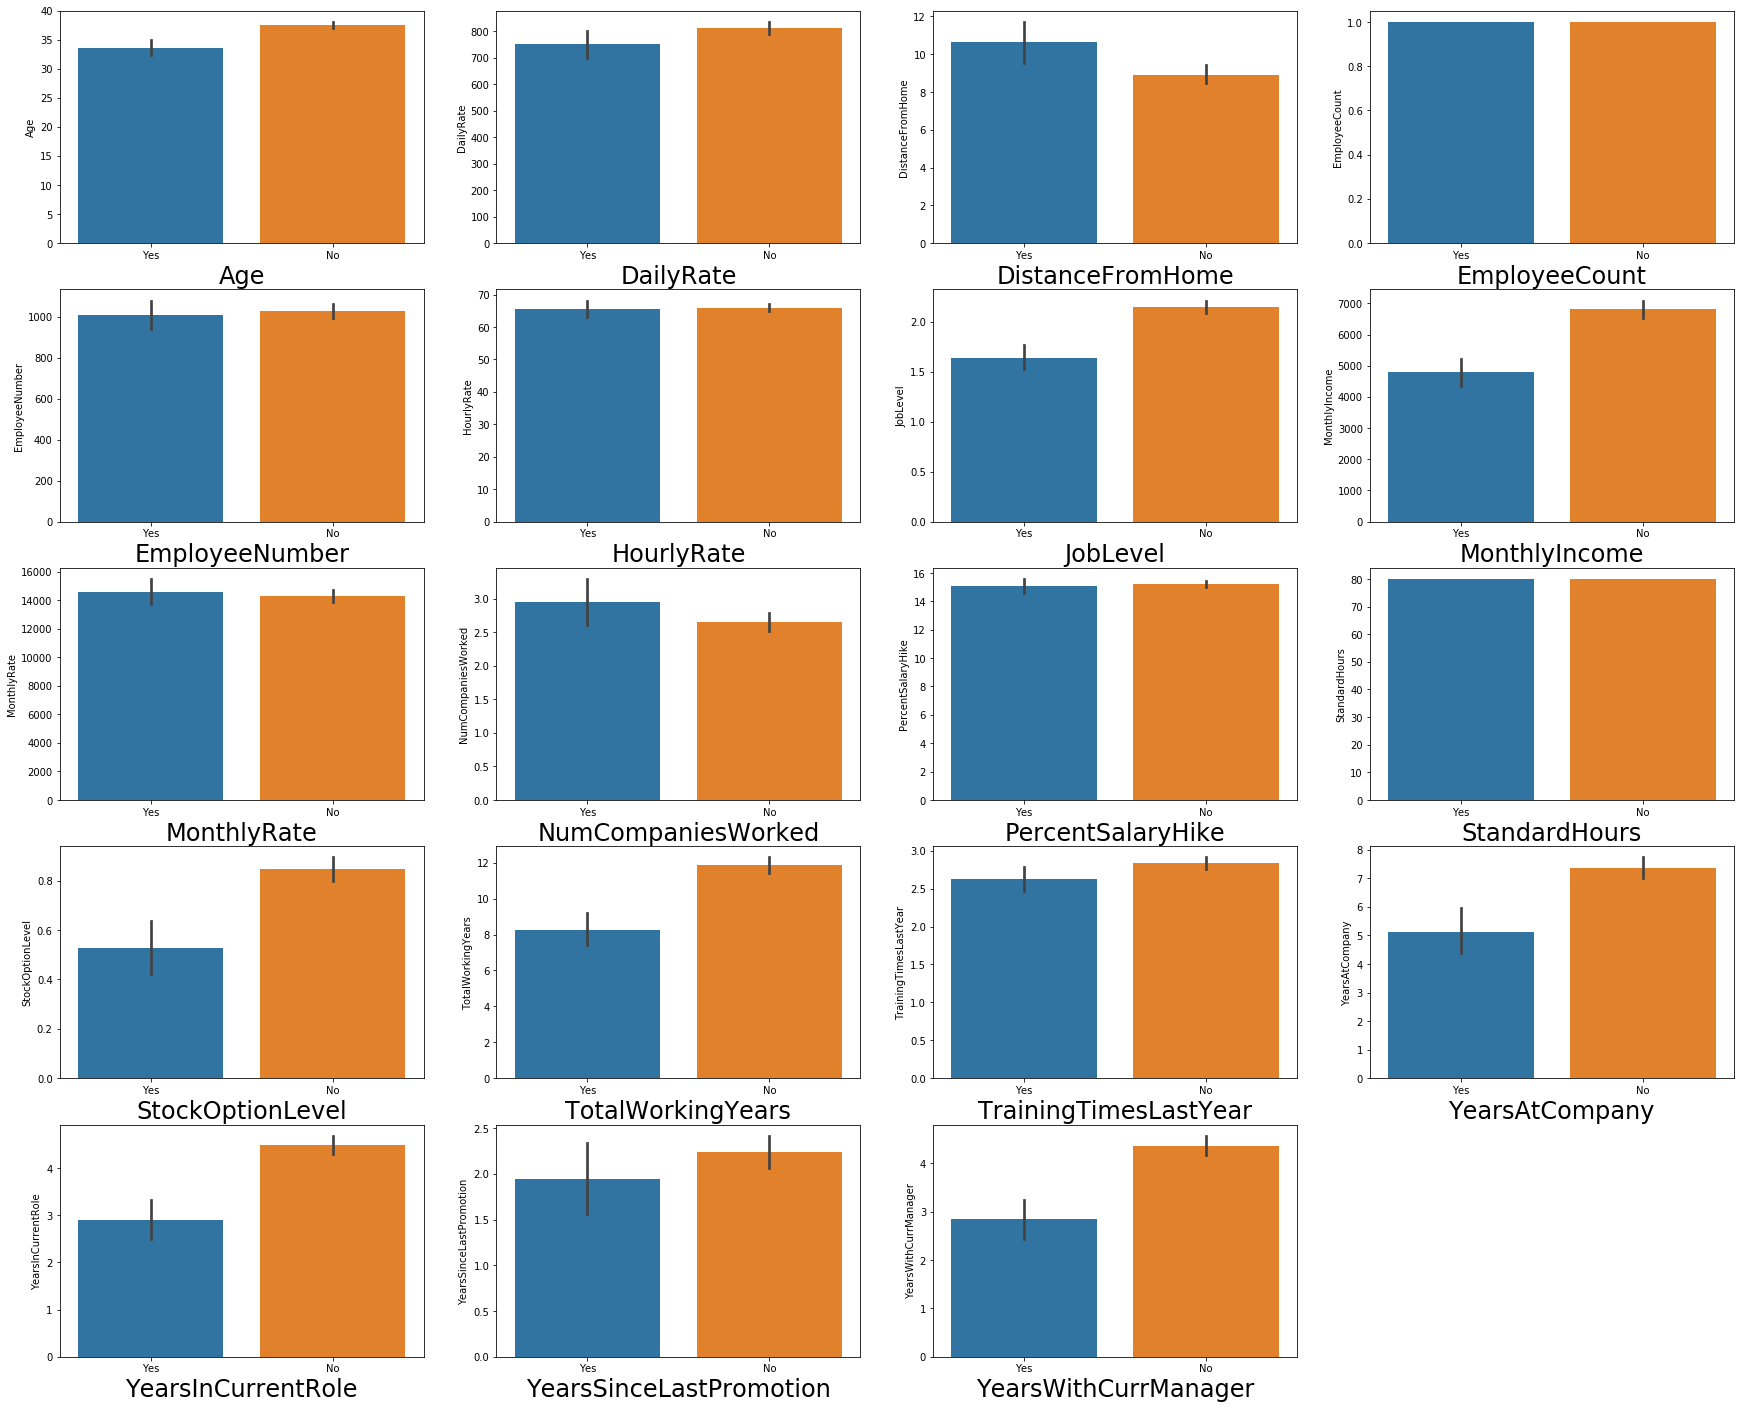

In [0]:
plt.figure(figsize=(30,35))
j = 1
k = 0
for i in numerical_features:
    plt.subplot(7,4,j)
    sns.barplot(y = df[i], x =df['Attrition'])
    plt.xlabel(numerical_features[k], fontsize =24)
    j = j+1
    k = k+1
plt.show()

##**EDA of Categorical Feature**

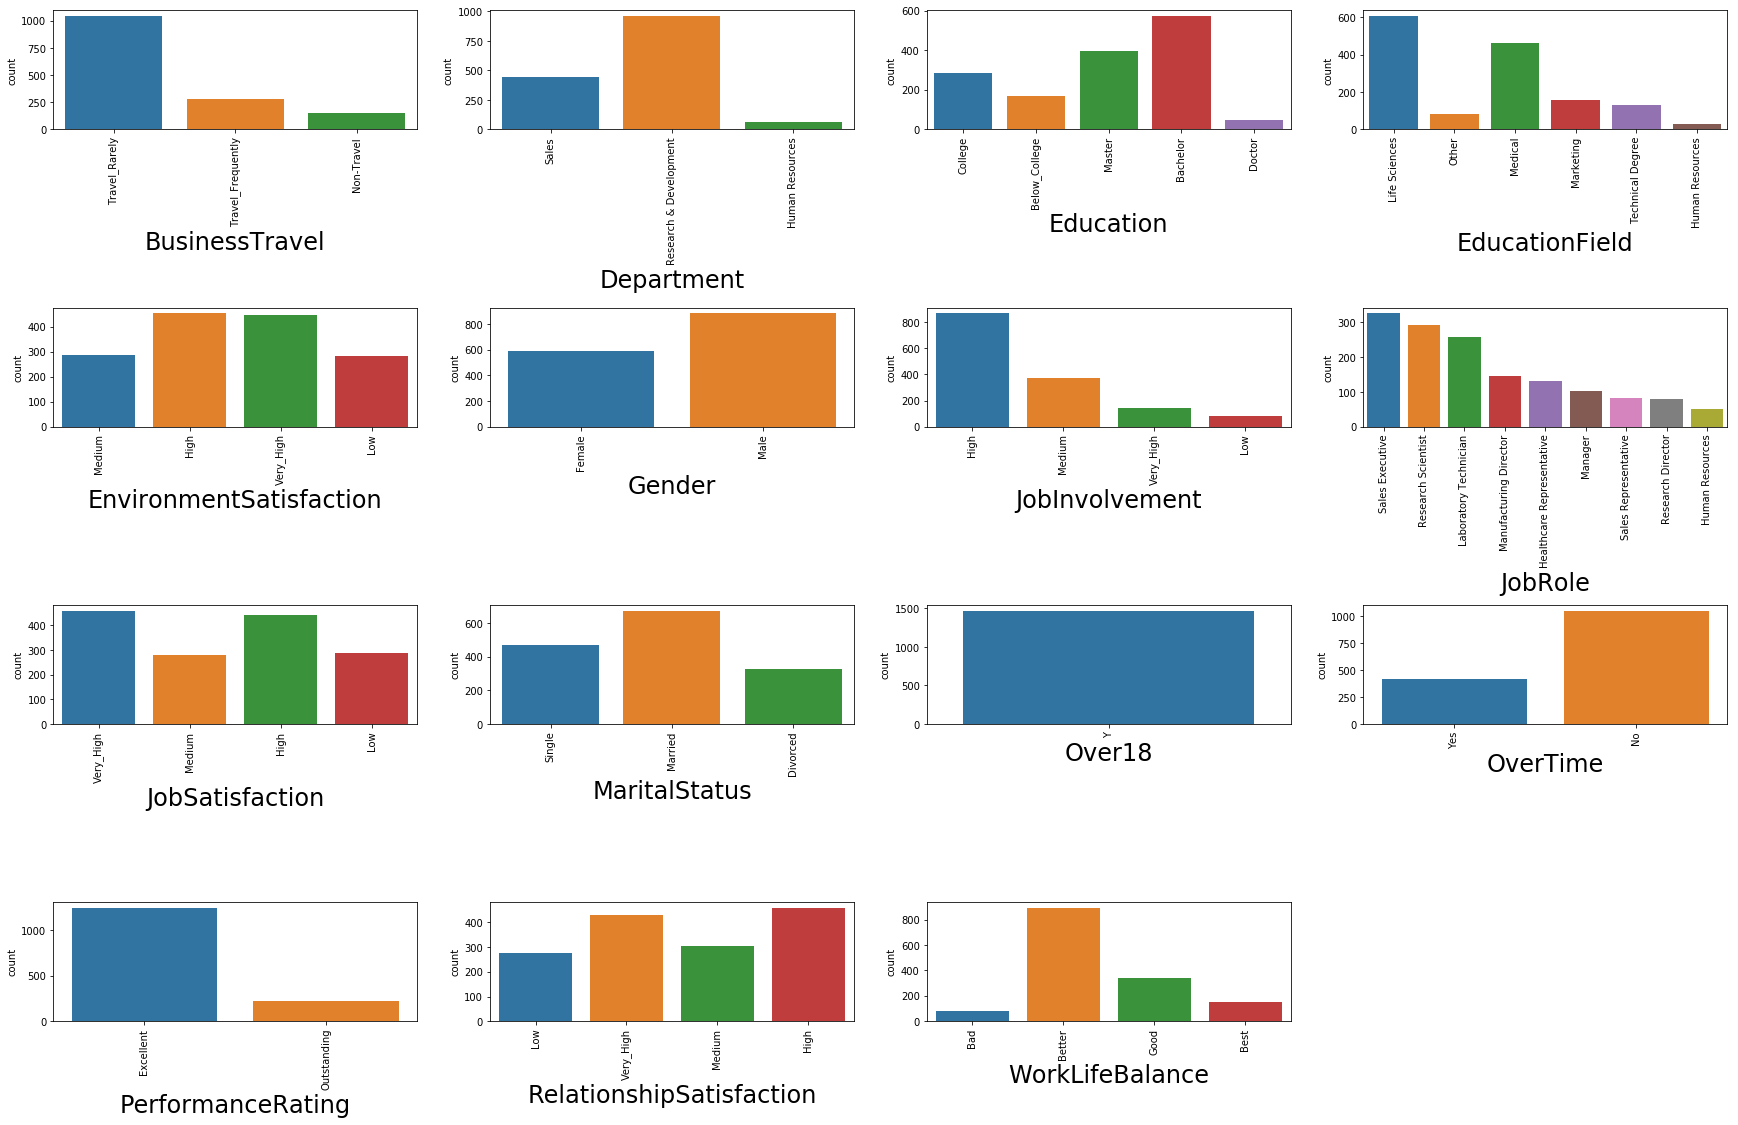

In [0]:
plt.figure(figsize=(30,35))
j = 1
k = 0
for i in categorical_features:
    
    plt.subplot(7,4,j)
    sns.countplot(df[i])
    plt.xlabel(categorical_features[k],fontsize=24)
    plt.xticks(rotation='vertical')
    plt.subplots_adjust(hspace = 1.5)
    j = j+1
    k = k+1
plt.show()

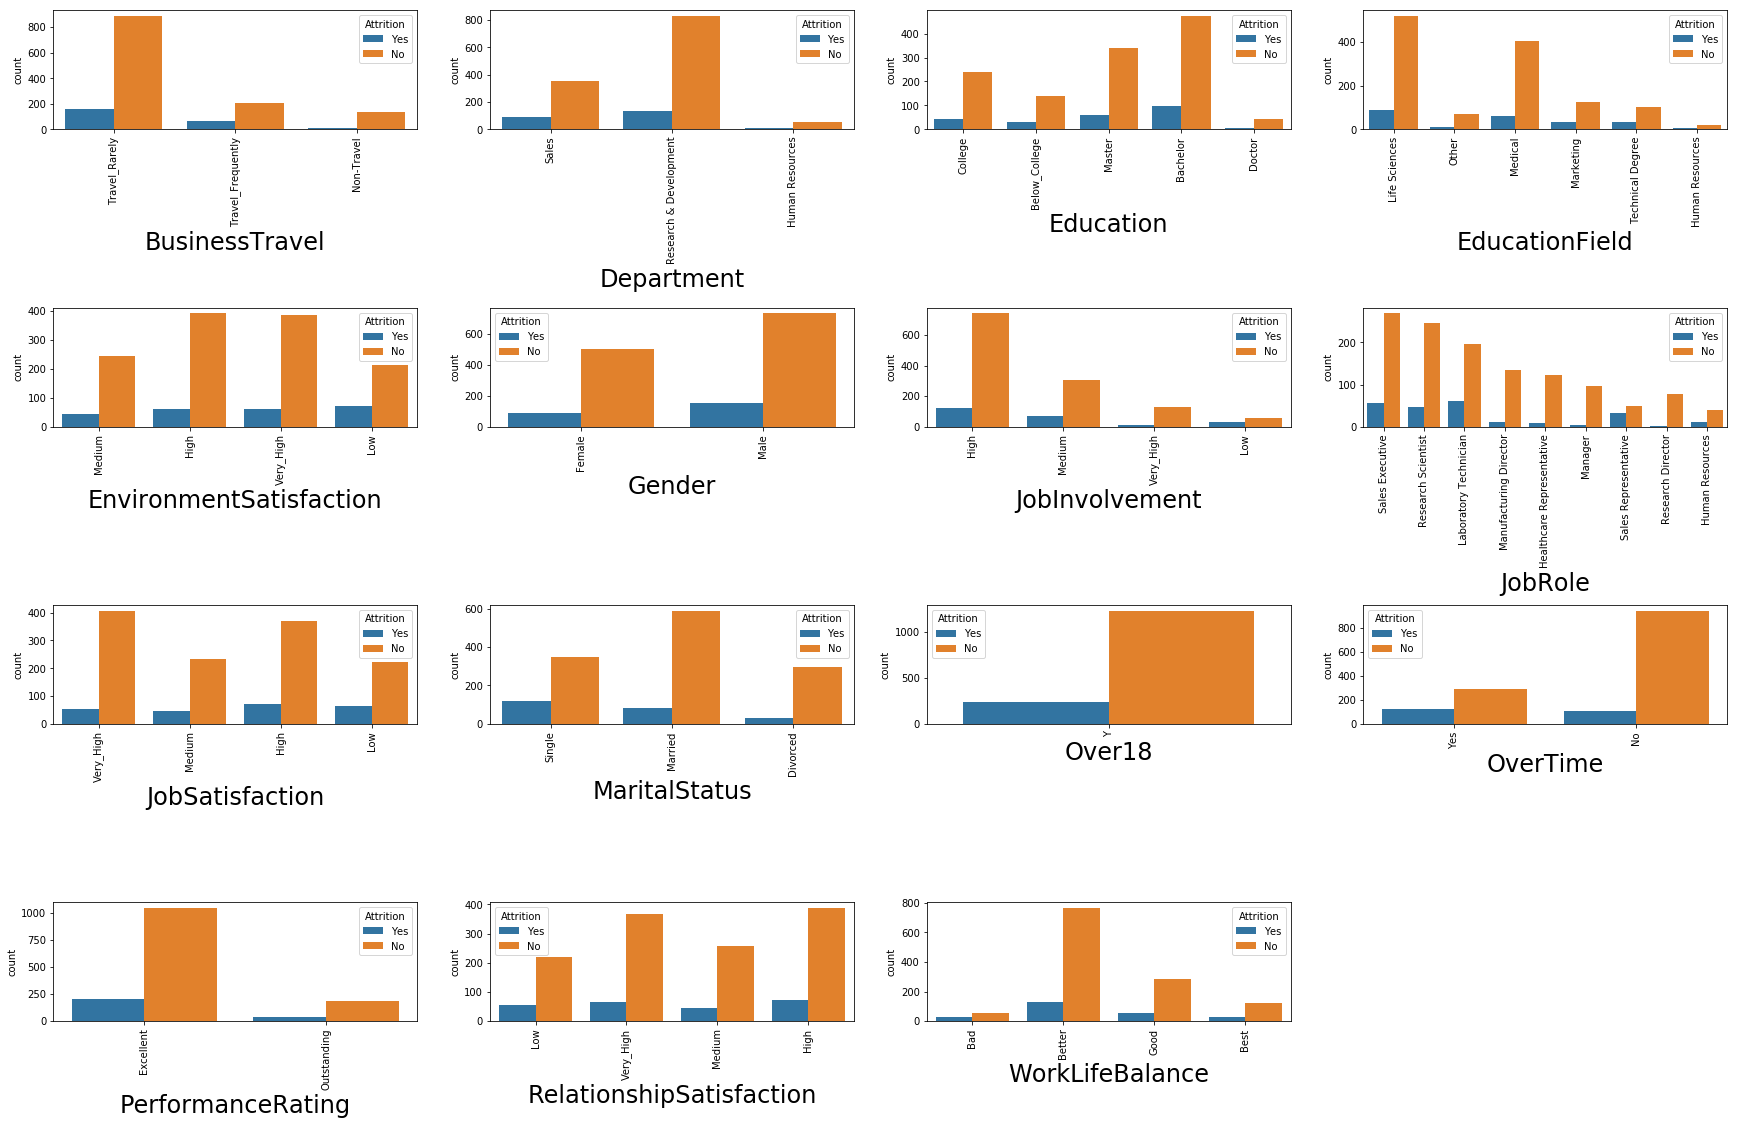

In [0]:
plt.figure(figsize=(30,35))
j = 1
k = 0
for i in categorical_features:
    plt.subplot(7,4,j)
    sns.countplot(x=df[i], hue =df['Attrition'])
    plt.xlabel(categorical_features[k], fontsize =24)
    plt.xticks(rotation='vertical')
    plt.subplots_adjust(hspace = 1.5)
    j = j+1
    k = k+1
plt.show()

In [0]:
corr = df[numerical_features].corr()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numerical_features),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_features)
ax.set_yticklabels(numerical_features)
plt.show()

#**Feature Selection**

##**Correlation of numerical features**

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numerical_features], 20))


##**VIF Scores of numerical features**

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[numerical_features]
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

##**Chi squre test of categorical features**

In [0]:
def chi_squre_test(data):
    cat_fea = list(combinations(data.columns, 2))
    variables = []
    var = []
    chi_squre_value = []
    p_value = []
    degrees_of_freedom = []
    v = []
    for i in cat_fea:
        table = pd.crosstab(data[i[0]],data[i[1]])
        if stats.chi2_contingency(table)[1]<0.01:
            var.append(i)
            v.append(i[0])
            v.append(i[1])
            if i[0] not in variables:
                variables.append(i[0])
            if i[1] not in variables:    
                variables.append(i[1])
            chi_squre_value.append(stats.chi2_contingency(table)[0])
            p_value.append(stats.chi2_contingency(table)[1])
            degrees_of_freedom.append(stats.chi2_contingency(table)[2])
    result = pd.DataFrame({'variables': var,
                            'chi_squre_value': chi_squre_value,
                            'p_value': p_value,
                            'degrees_of_freedom': degrees_of_freedom})
    result = result.sort_values(by=['chi_squre_value'], ascending= False)
    print("The categorical variables that are highly correlated are:",'\n',result.loc[:,['variables','chi_squre_value','p_value']]),
    return variables
    

In [0]:
cor_cat =  chi_squre_test(df[categorical_features])

In [0]:
cor_cat

In [0]:
"""from collections import Counter
a = Counter(m)
sorted_by_value = sorted(a.items(), key=lambda kv: kv[1])
sorted_by_value"""

##**Selecting features and target**

In [0]:
features = df.loc[:,['Age','BusinessTravel', 'DailyRate',
       'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement','JobSatisfaction',
       'MaritalStatus','MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
target = df.loc[:,['Attrition']]

#** Model Selection**

In [0]:
num_fea, cat_fea = split_nu_cat(features)

##**Multiencoder Algorithm**

In [0]:
class MultiColumnLabelEncoder():
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                        dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return dframe

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[
                    idx].transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        return dframe

##**moving on**

In [0]:
features[cat_fea] = MultiColumnLabelEncoder.fit_transform(self = features[cat_fea],dframe = features[cat_fea])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [0]:
target = LabelEncoder().fit_transform(target)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Model Building**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [0]:
clf1 = RandomForestClassifier(random_state = 0)
clf2 = LogisticRegression(random_state = 0)
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state = 0)
clf5 = GradientBoostingClassifier(random_state = 0)
clf6 = BaggingClassifier(random_state = 0)
clf7 = svm.LinearSVC(random_state = 0)
clf8 = GaussianNB()

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()], ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()], ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()], ['clf', clf5]])
pipe6 = Pipeline([['sc', StandardScaler()], ['clf', clf6]])
pipe7 = Pipeline([['sc', StandardScaler()], ['clf', clf7]])
pipe8 = Pipeline([['sc', StandardScaler()], ['clf', clf8]])

clf_labels = ['Random Forest','Logistic Regression', 'KNN', 'Decision Tree', 'Gradient Boosting classifier', 'Bagging classifier', 'SVM', 'Naive Bayse']
print('10-fold cross validation:\n')

for clf, label in zip([pipe1, pipe2, pipe3,pipe4,pipe5,pipe6,pipe7,pipe8], clf_labels):
    scores = cross_val_score(estimator=clf,
                              X=X_train,
                              y=y_train,
                              cv=10,
                              scoring='roc_auc')
    
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by Sta

10-fold cross validation:



/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScale

ROC AUC: 0.67 (+/- 0.05) [Random Forest]
ROC AUC: 0.77 (+/- 0.07) [Logistic Regression]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.trans

ROC AUC: 0.64 (+/- 0.05) [KNN]
ROC AUC: 0.59 (+/- 0.04) [Decision Tree]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

ROC AUC: 0.77 (+/- 0.06) [Gradient Boosting classifier]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

ROC AUC: 0.67 (+/- 0.06) [Bagging classifier]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Converge

ROC AUC: 0.77 (+/- 0.07) [SVM]
ROC AUC: 0.74 (+/- 0.07) [Naive Bayse]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transfo

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by Sta

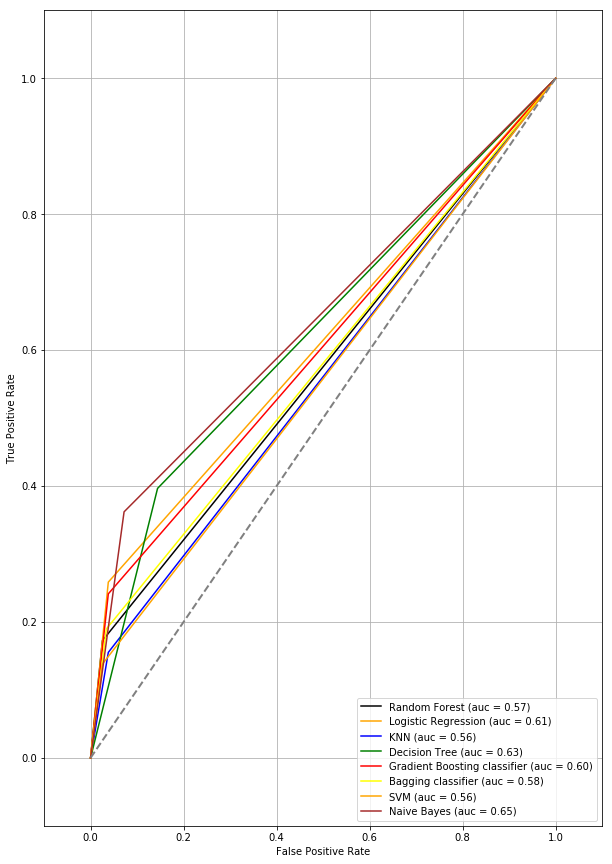

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green','red','yellow','orange','brown']
all_clf = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7, pipe8]
clf_labels = ['Random Forest','Logistic Regression', 'KNN', 'Decision Tree', 'Gradient Boosting classifier', 'Bagging classifier', 'SVM', 'Naive Bayes']

plt.figure(figsize=(10,15))
for clf, label, clr in zip(all_clf, clf_labels, colors):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
          linestyle='--',
          color='gray',
          linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [0]:
score_mean = []
score_std  = []
labels = []
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                              X=X_train,
                              y=y_train,
                              cv=10,
                              scoring='f1')
    score_mean.append(scores.mean())
    score_std.append(scores.std())
    labels.append(label)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y

In [0]:
for i in range(len(labels)):
    print("F1 Score: %0.2f (+/- %0.2f) [%s]"%(score_mean[i], score_std[i], labels[i]))

F1 Score: 0.17 (+/- 0.11) [Random Forest]
F1 Score: 0.32 (+/- 0.07) [Logistic Regression]
F1 Score: 0.17 (+/- 0.07) [KNN]
F1 Score: 0.30 (+/- 0.07) [Decision Tree]
F1 Score: 0.33 (+/- 0.08) [Gradient Boosting classifier]
F1 Score: 0.23 (+/- 0.10) [Bagging classifier]
F1 Score: 0.20 (+/- 0.08) [SVM]
F1 Score: 0.41 (+/- 0.05) [Naive Bayes]


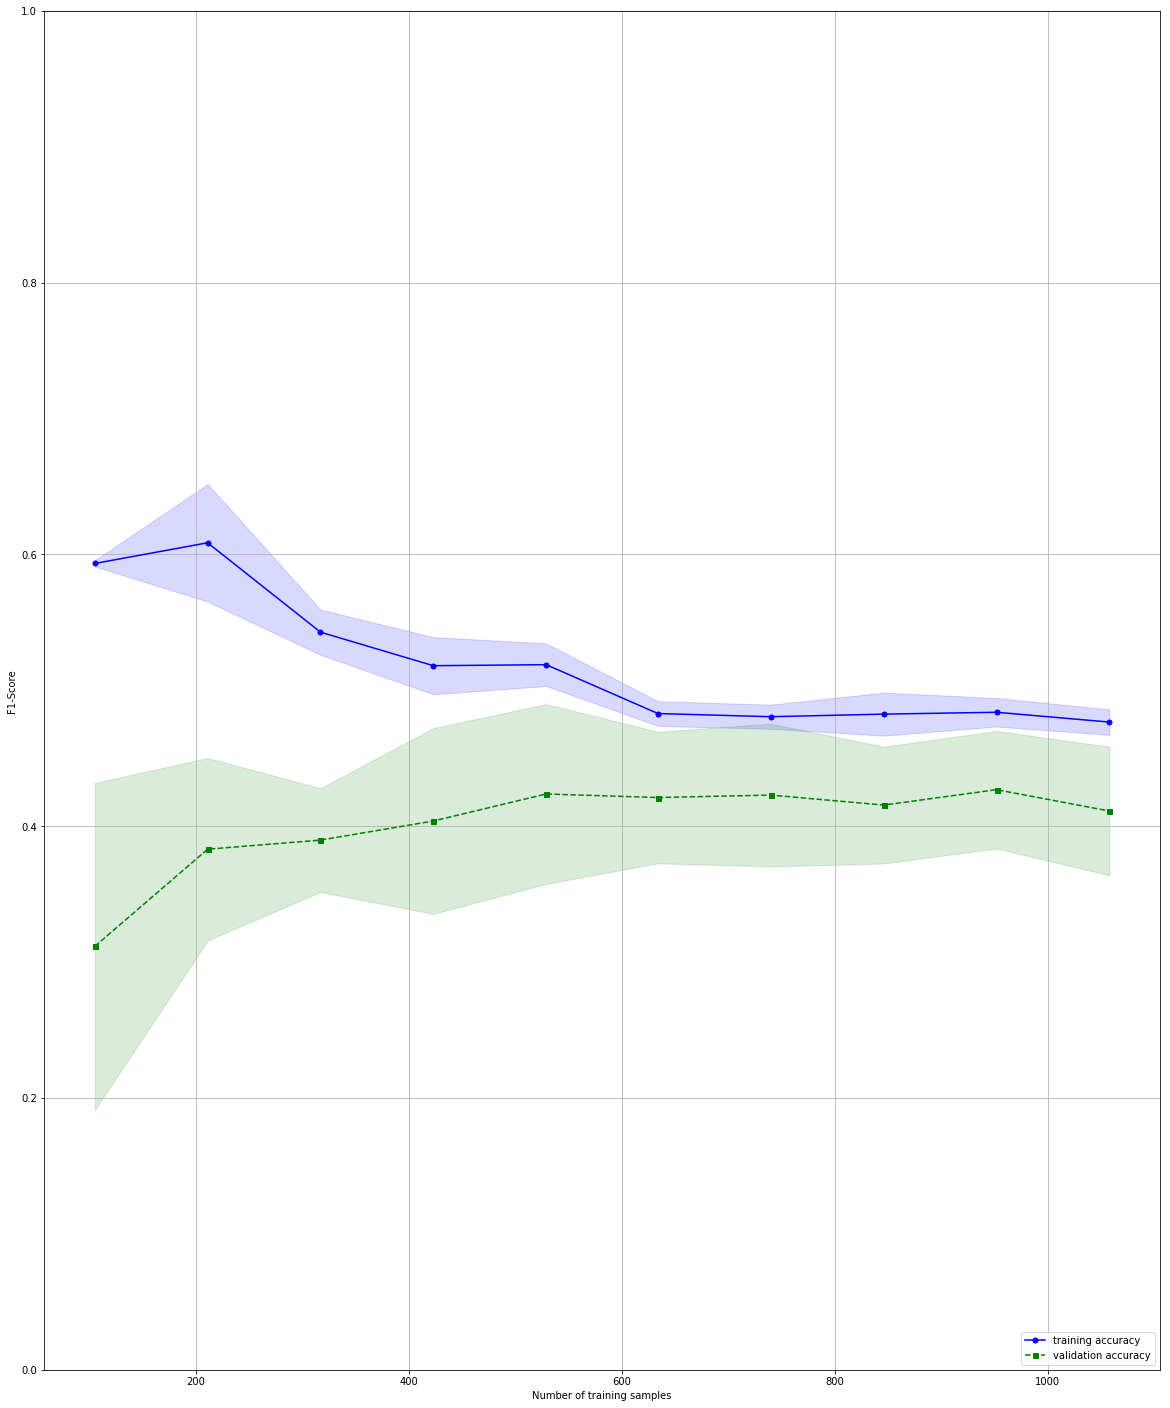

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', GaussianNB())])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,scoring='f1',n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(20,25))
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('F1-Score')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

##**Seqential back selection algorithm**

In [0]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=f1_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size,
                                 random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train,
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [0]:
sbs = SBS(GaussianNB(), k_features= 1)
X_train_std = StandardScaler().fit_transform(X_train)
sbs.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set 

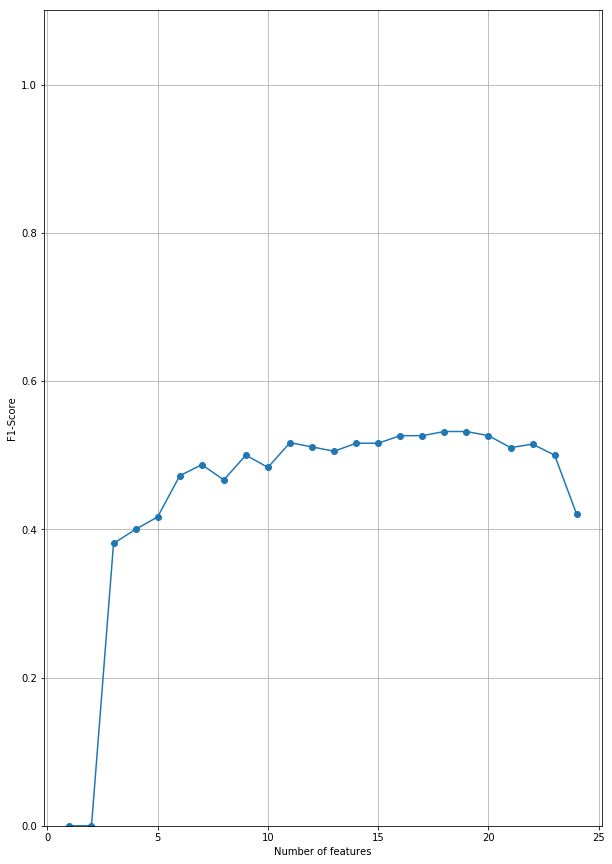

In [0]:
k_feat = [len(k) for k in sbs.subsets_]
plt.figure(figsize=(10,15))
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0, 1.1])
plt.ylabel('F1-Score')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [0]:
k5 = list(sbs.subsets_[6])
for i in k5:
    print(features.columns[i])

Age
BusinessTravel
DailyRate
DistanceFromHome
Gender
HourlyRate
JobInvolvement
JobSatisfaction
MaritalStatus
OverTime
PercentSalaryHike
PerformanceRating
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager
